In [1]:
import pandas as pd
import numpy as np

In [2]:
activity_raw = pd.read_csv('BigContest/train_activity.csv')

In [3]:
activity_raw.dtypes

day                    int64
acc_id                 int64
char_id                int64
server                object
playtime             float64
npc_kill             float64
solo_exp             float64
party_exp            float64
quest_exp            float64
boss_monster           int64
death                float64
revive               float64
exp_recovery         float64
fishing              float64
private_shop         float64
game_money_change    float64
enchant_count        float64
dtype: object

In [4]:
activity = activity_raw[['acc_id','private_shop','day']].sort_values(['acc_id','day'],ascending=True)
activity

,acc_id,private_shop,day
37347,2,2.493091,1
91650,2,3.188761,2
146424,2,3.223522,3
201150,2,3.171419,4
256769,2,3.175172,5
311844,2,3.174421,6
367212,2,3.174698,7
423613,2,2.576400,8
479282,2,3.110744,9
534937,2,3.184771,10


In [5]:
act_grp= activity.groupby(['acc_id']).sum().drop(columns = 'day')
act_grp

,private_shop
acc_id,
2,85.964758
5,0.000000
8,0.000000
17,0.000000
20,2.954237
21,0.000000
31,0.000000
38,0.000000
41,0.000000


In [6]:
act_grp.dtypes
# act_grp['acc_id'] = act_grp.index
# act_grp
# act_grp.drop(index)

private_shop    float64
dtype: object

In [7]:
label_raw = pd.read_csv('BigContest/train_label.csv')

In [8]:
label_raw.dtypes

acc_id             int64
survival_time      int64
amount_spent     float64
dtype: object

In [9]:
label = label_raw[['acc_id','survival_time']]
label

,acc_id,survival_time
0,27835,64
1,12351,64
2,125437,55
3,104483,64
4,4704,20
5,3277,50
6,118874,64
7,7678,5
8,124997,46
9,116489,23


In [10]:
lbl_act_mrg= label.merge(act_grp,how='inner',on='acc_id').sort_values(['survival_time','private_shop'],ascending=False)
lbl_act_mrg#.sort_values(['survival_time','fishing'],ascending=False)

,acc_id,survival_time,private_shop
22526,92015,64,92.530072
17925,26467,64,92.129798
21914,18360,64,92.058576
27426,6678,64,91.975740
27657,45694,64,91.938727
19851,34361,64,91.935685
30689,699,64,91.932209
28184,52208,64,91.920990
22169,27575,64,91.911826
20321,47419,64,91.866477


In [11]:
lbl_act_mrg.drop(columns = 'acc_id')

,survival_time,private_shop
22526,64,92.530072
17925,64,92.129798
21914,64,92.058576
27426,64,91.975740
27657,64,91.938727
19851,64,91.935685
30689,64,91.932209
28184,64,91.920990
22169,64,91.911826
20321,64,91.866477


In [14]:
grp_df = pd.DataFrame({'survival_time':lbl_act_mrg['survival_time'], 'private_shop':lbl_act_mrg['private_shop']})


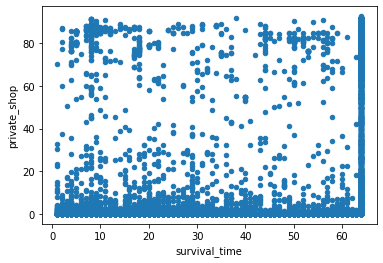

In [15]:
grp_df.plot.scatter(x='survival_time',y='private_shop')